
# Topic: Process Monitoring via PLS using PDS_PLS module

#### For illustration, we will use data collected from an LDPE (low-density polyethylene) manufacturing process. 
#### Full details on the process is available in our book 'Machine Learning for Process Systems Engineering' (https://leanpub.com/machineLearningPSE)

#### The dataset consists of 54 samples of 14 process variables and 5 product quality variables. It is known that a process fault occurs sample 51 onwards. Our objective here is to build a fault detection tool that clearly indicates the onset of process fault. 


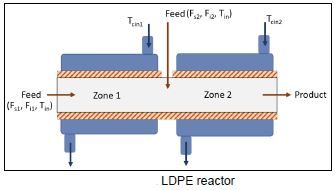

In [1]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
from PDStoolkit import PDS_PLS

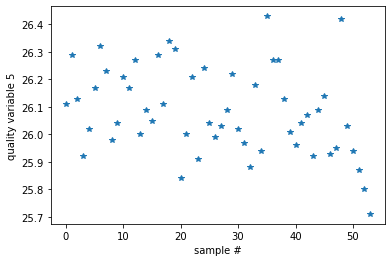

In [4]:
# fetch LDPE data
data = pd.read_csv('LDPE.csv', usecols = range(1,20)).values
data_train = data[:-4,:] # exclude last 4 samples for testing later

# plot quality variable for a quick check
quality_var = 5

plt.figure()
plt.plot(data[:,13+quality_var], '*')
plt.xlabel('sample #')
plt.ylabel('quality variable ' + str(quality_var))
plt.show()

In [ ]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Train the monitoring model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [8]:
# separate input and output data
X_train = data_train[:,:-5]
Y_train = data_train[:,-5:]

#### Next we will fit PDS_PLS model. We will not scale the data as the PDS_PLS (or the super PLS class) class performs scaling by default.  Therefore, scale or unscaled data will provide same results.

In [9]:
# build PDS_PLS model
pls = PDS_PLS(n_components = 3)
pls.fit(X_train, Y_train)

PDS_PLS(n_components=3)

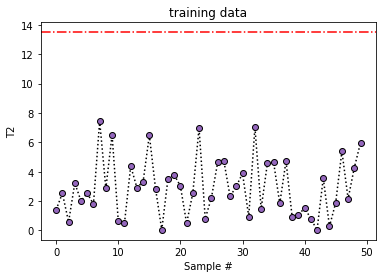

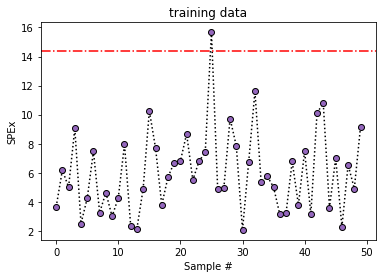

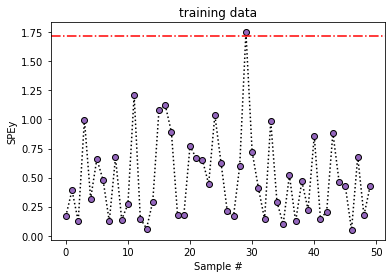

In [13]:
# use methods of the fitted PDS_PLS object to compute monitoring metrics, their thresholds, and plot monitoring charts
metrics_train = pls.computeMetrics(X_train, Y_train, isTrainingData=True)
T2_CL, SPEx_CL, SPEy_CL = pls.computeThresholds(method='statistical', alpha=0.01)
pls.draw_monitoring_charts(metrics=metrics_train, title='training data')

# the above three lines fo code could equivalently be replaced with the following
# pls.fit_4_monitoring(X_train, Y_train, method='statistical', alpha=0.01)

In [21]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##       Fault detection on test data using the trained monitoring model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [14]:
#  get test data
# Just for illustration, we will use the complete dataset as test data
X_test = data[:,:-5]
Y_test = data[:,-5:]

Number of abnormal sample(s):  4


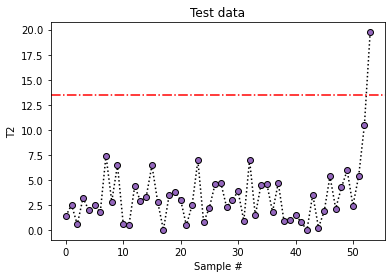

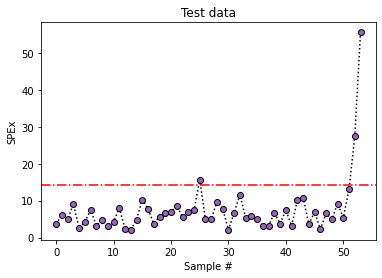

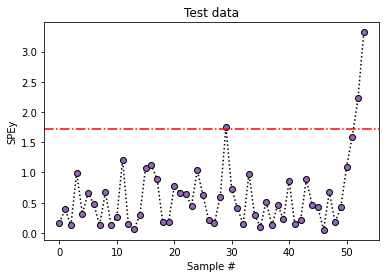

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True])

In [16]:
# check abnormalities
pls.detect_abnormalities(X_test, Y_test, title='Test data') # an array of bool values is returned with value of True for abnormal samples and False for normal samples

#### With statistically determined thesholds, our monitoring model would detect two out of 4 abnormal samples present towards the end of the dataset.